# UFO Sightings Analysis
# Highlighted Reports
## Team Martianas (Angelica, Taryn, Tiffany)
### "NUFORC staff review each report, and highlight a small subset of what we feel to be the most credible or interesting cases. "

In [3]:
import pandas as pd
import numpy as np
import requests as rs
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup# as soup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [4]:
# Initialize Chrome webdriver
driver = webdriver.Chrome() 
base_url = "https://nuforc.org/subndx/?id=highlights"
driver.get(base_url)

# Initialize lists to store headers and data
headers = []
data = []

# Need to Loop through all website pages
while True:
    # Get the current page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Table Data
    table = soup.find('table')
    if not headers:  # Need this because only need the headers once as they are the same
        headers = [th.text.strip() for th in table.find_all('th')]

    # Data rows
    data_rows = table.find_all('tr')[1:]  # This Skips the header row
    for row in data_rows:
        data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns

    # Need to wait for the next button
    next_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "table_1_next"))
    )

#     # Check if the next button is disabled
    if 'disabled' in next_button.get_attribute('class'):
        break  # Break loop if next button is disabled

    # Click the next button
    next_button.click()

# Close the webdriver
driver.quit()



In [5]:
df = pd.DataFrame(data,columns=headers)
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
0,Open !,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995,11/20/2001,Y
1,Open !,08/25/1995 00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...,08/24/1995,11/02/1999,
2,Open !,05/27/1997 11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...,03/03/1997,03/07/1998,
3,Open !,06/15/1977 03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...,09/29/1999,10/02/1999,
4,Open !,01/24/2003 18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...,01/31/2003,02/05/2003,Y


In [6]:
df.tail()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
803,Open !,10/12/2023 23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...,,None,None
804,Open !,10/12/2023 20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights...",,None,None
805,Open !,10/09/2023 03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...,,None,None
806,Open !,10/08/2023 19:37,Powell Butte,OR,USA,Disk,Large disk,,None,None
807,,,,,,,,,None,None


In [7]:
num_rows = len(df)
num_rows

808

In [8]:
# Cleaning- Do not need these columns to answer questions
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media', 'Posted'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported
0,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995
1,08/25/1995 00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...,08/24/1995
2,05/27/1997 11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...,03/03/1997
3,06/15/1977 03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...,09/29/1999
4,01/24/2003 18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...,01/31/2003


In [9]:
# Will need to change Occured and reported to date time
datatypes = df.dtypes 
datatypes

Occurred    object
City        object
State       object
Country     object
Shape       object
Summary     object
Reported    object
dtype: object

In [10]:
Reported = df['Reported'].value_counts()
print(Reported)

Reported
              442
Y             266
11/27/2021      4
05/12/2016      2
06/06/2016      1
             ... 
04/25/2007      1
03/30/2007      1
01/16/2007      1
10/27/2006      1
02/02/2015      1
Name: count, Length: 98, dtype: int64


In [11]:
Occurred = df['Occurred'].value_counts()
print(Occurred)

Occurred
01/27/2024 03:00    14
                     9
10/08/2023 19:37     7
12/16/2023 20:50     7
01/08/2024 01:00     7
                    ..
12/15/2016 20:00     1
06/15/1997 18:00     1
01/28/2017 20:50     1
06/20/2015 13:30     1
11/23/2021 20:30     1
Name: count, Length: 199, dtype: int64


In [12]:
country_list = df['Country'].value_counts()
print(country_list)

Country
USA                              691
Canada                            18
Unspecified                       18
United Kingdom                    16
Brazil                            14
                                   8
Australia                          8
Mexico                             7
International Waters               7
Türkiye                            7
Oman                               7
Algeria                            1
Internatonal Waters                1
Singapore                          1
South Africa                       1
Atlantic Ocean                     1
Puerto Rico/Burmuda (between)      1
China                              1
Name: count, dtype: int64


In [13]:
state_list = df['State'].value_counts()
print(state_list)

State
AZ                   54
                     50
FL                   37
PA                   31
IL                   30
WA                   29
TX                   29
NC                   25
MN                   25
OH                   24
OK                   24
OR                   23
MD                   23
CA                   23
KS                   22
NE                   21
ON                   16
VA                   16
MI                   16
NY                   15
GA                   15
WI                   15
AL                   15
CT                   14
England              14
AR                   14
IN                   14
ID                   14
CO                   10
KY                    9
NJ                    8
MA                    8
MS                    8
WY                    7
NH                    7
Yucatan               7
UT                    7
SC                    7
ME                    7
SD                    7
Erzincan              7
WV        

In [14]:
city_list = df['City'].value_counts()
print(city_list)

City
                                     63
Lincolnshire                         14
Oklahoma City                        14
Stillwater                            8
Santa Fe                              8
                                     ..
Huntington Beach                      1
Lahaina                               1
Davie                                 1
Borrego Springs                       1
Nr. Town of Porthmadog (UK/Wales)     1
Name: count, Length: 181, dtype: int64


In [15]:
shape_list = df['Shape'].value_counts()
print(shape_list)

Shape
Light        185
Triangle     124
Orb          101
Disk          81
Sphere        43
Unknown       37
Other         30
Rectangle     27
Cigar         25
Formation     24
Diamond       24
Cylinder      18
              16
Changing      15
Circle        13
Chevron       12
Teardrop       8
Oval           7
Star           7
Fireball       7
Egg            3
Cross          1
Name: count, dtype: int64


In [16]:
df.shape

(808, 7)

In [19]:
# Split Occured column to Date and Time
df[['Date Occured','Time Occured']]=df.Occurred.str.split(' ',expand=True)
df

,Occurred,City,State,Country,Shape,Summary,Reported,Date Occured,Time Occured
0,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995,12/29/1994,21:45
1,08/25/1995 00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...,08/24/1995,08/25/1995,00:40
2,05/27/1997 11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...,03/03/1997,05/27/1997,11:33
3,06/15/1977 03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...,09/29/1999,06/15/1977,03:00
4,01/24/2003 18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...,01/31/2003,01/24/2003,18:13
...,...,...,...,...,...,...,...,...,...
803,10/12/2023 23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...,,10/12/2023,23:40
804,10/12/2023 20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights...",,10/12/2023,20:35
805,10/09/2023 03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...,,10/09/2023,03:30
806,10/08/2023 19:37,Powell Butte,OR,USA,Disk,Large disk,,10/08/2023,19:37


In [20]:
clean_df = df[['Date Occured', 'Time Occured', 'City', 'State', 'Country', 'Shape', 'Summary' ]]

clean_df.head()

clean_df.to_csv("Resources/highlighted_data.csv", index=False)

# USA Sightings vs Other Countries

In [21]:
num_countries = clean_df['Country'].nunique()
num_countries 

18

In [22]:
countries_count = clean_df['Country'].value_counts()
countries_count

Country
USA                              691
Canada                            18
Unspecified                       18
United Kingdom                    16
Brazil                            14
                                   8
Australia                          8
Mexico                             7
International Waters               7
Türkiye                            7
Oman                               7
Algeria                            1
Internatonal Waters                1
Singapore                          1
South Africa                       1
Atlantic Ocean                     1
Puerto Rico/Burmuda (between)      1
China                              1
Name: count, dtype: int64

In [23]:
country_activity = clean_df.groupby('Country').size().sort_values(ascending=False)
country_activity



Country
USA                              691
Unspecified                       18
Canada                            18
United Kingdom                    16
Brazil                            14
                                   8
Australia                          8
International Waters               7
Oman                               7
Türkiye                            7
Mexico                             7
China                              1
Internatonal Waters                1
Algeria                            1
Puerto Rico/Burmuda (between)      1
Singapore                          1
South Africa                       1
Atlantic Ocean                     1
dtype: int64

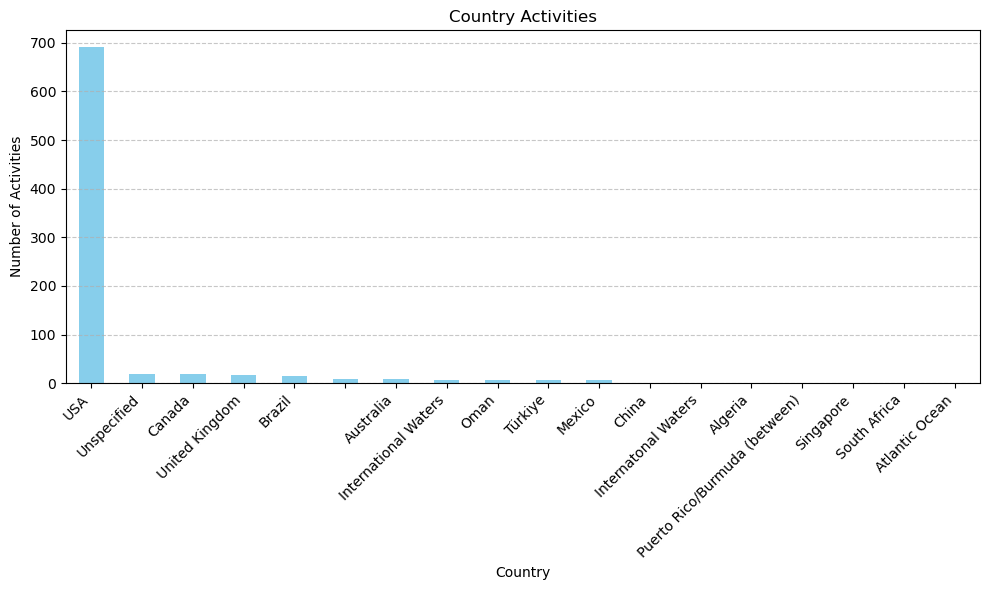

In [24]:
# Bar Plot
plt.figure(figsize=(10, 6)) 
country_activity.plot(kind='bar', color='skyblue')  
plt.title('Country Activities')  
plt.xlabel('Country')  
plt.ylabel('Number of Activities')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

# USA States (Highest and Lowest Sightings)

In [25]:
usa_data = clean_df[clean_df['Country'] == 'USA']
usa_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,12/29/1994,21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,..."
1,08/25/1995,00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...
5,03/08/2003,20:15,Greenbelt area,MD,USA,Chevron,Totally Silent 'Flying Wing' Seen Twice Within...
6,05/01/2003,22:00,Seattle (West Seattle),WA,USA,Triangle,"Silent, triangular craft sighted over West Sea..."
7,02/16/2003,23:00,Seattle (Juanita area),WA,USA,,
...,...,...,...,...,...,...,...
802,10/13/2023,19:00,"Sonoita, Arizona",AZ,USA,Light,Bright light lasting for 5 to 6 total Mississi...
803,10/12/2023,23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...
804,10/12/2023,20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights..."
805,10/09/2023,03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...


In [26]:
usa_data = clean_df[clean_df['Country'] == 'USA']

# Create a new DataFrame for just values under Country-USA
usa_df = pd.DataFrame(usa_data)
usa_df

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,12/29/1994,21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,..."
1,08/25/1995,00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...
5,03/08/2003,20:15,Greenbelt area,MD,USA,Chevron,Totally Silent 'Flying Wing' Seen Twice Within...
6,05/01/2003,22:00,Seattle (West Seattle),WA,USA,Triangle,"Silent, triangular craft sighted over West Sea..."
7,02/16/2003,23:00,Seattle (Juanita area),WA,USA,,
...,...,...,...,...,...,...,...
802,10/13/2023,19:00,"Sonoita, Arizona",AZ,USA,Light,Bright light lasting for 5 to 6 total Mississi...
803,10/12/2023,23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...
804,10/12/2023,20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights..."
805,10/09/2023,03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...


In [27]:
datatypes = df.dtypes 
datatypes

Occurred        object
City            object
State           object
Country         object
Shape           object
Summary         object
Reported        object
Date Occured    object
Time Occured    object
dtype: object

In [28]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Occured  691 non-null    object
 1   Time Occured  691 non-null    object
 2   City          691 non-null    object
 3   State         691 non-null    object
 4   Country       691 non-null    object
 5   Shape         691 non-null    object
 6   Summary       691 non-null    object
dtypes: object(7)
memory usage: 43.2+ KB


In [29]:
usa_df['Date Occured'] = pd.to_datetime(usa_df['Date Occured'])
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
dtype: object


In [30]:
usa_df['Time Occured'] = pd.to_datetime(usa_df['Time Occured']).dt.time
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
dtype: object


C:\Users\16025\AppData\Local\Temp\ipykernel_24596\3575029116.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_df['Time Occured'] = pd.to_datetime(usa_df['Time Occured']).dt.time


In [31]:
time_values = usa_df['Time Occured'].value_counts()
time_values

Time Occured
19:00:00    29
03:00:00    28
21:00:00    23
21:15:00    21
03:30:00    21
            ..
10:30:00     1
08:20:00     1
05:15:00     1
23:30:00     1
21:45:00     1
Name: count, Length: 107, dtype: int64

In [32]:
state_counts = usa_df['State'].value_counts()
state_counts

State
AZ    54
FL    37
PA    31
IL    30
TX    29
WA    29
MN    25
NC    25
OK    24
OH    24
CA    23
OR    23
MD    23
KS    22
NE    21
MI    16
VA    16
WI    15
GA    15
AL    15
NY    15
ID    14
IN    14
AR    14
CT    14
CO    10
KY     9
NJ     8
MA     8
MS     8
UT     7
WY     7
SC     7
SD     7
ME     7
NV     7
NH     7
DC     7
-      7
WV     7
NM     4
MO     3
HI     2
PR     1
Name: count, dtype: int64

## Top 5

In [33]:
top_5_states = state_counts.head(5)
top_5_states

State
AZ    54
FL    37
PA    31
IL    30
TX    29
Name: count, dtype: int64

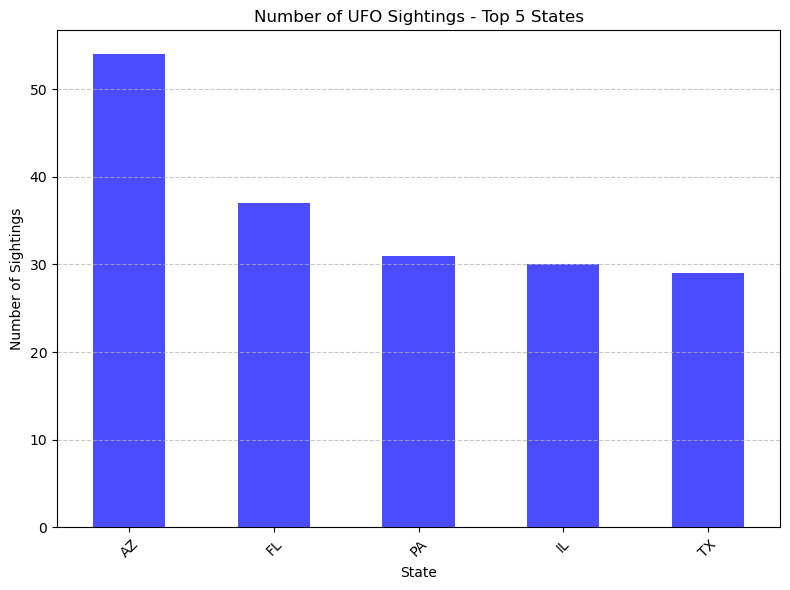

In [34]:
# Top 5 Graph

plt.figure(figsize=(8, 6))
top_5_states.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of UFO Sightings - Top 5 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 10

In [35]:
top_10_states = state_counts.head(10)
top_10_states

State
AZ    54
FL    37
PA    31
IL    30
TX    29
WA    29
MN    25
NC    25
OK    24
OH    24
Name: count, dtype: int64

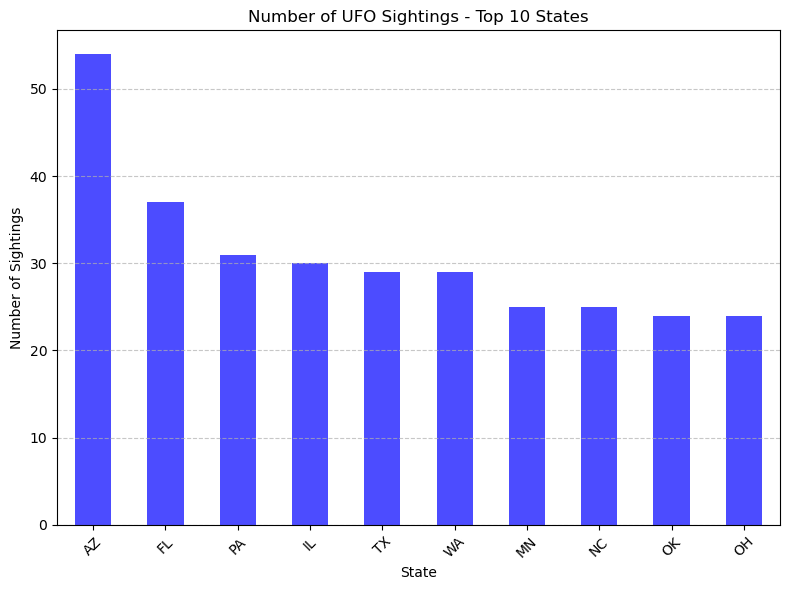

In [36]:
# Top 10 Graph

plt.figure(figsize=(8, 6))
top_10_states.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of UFO Sightings - Top 10 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bottom 5

In [37]:
bottom_5_states = state_counts.tail(5)
bottom_5_states

State
WV    7
NM    4
MO    3
HI    2
PR    1
Name: count, dtype: int64

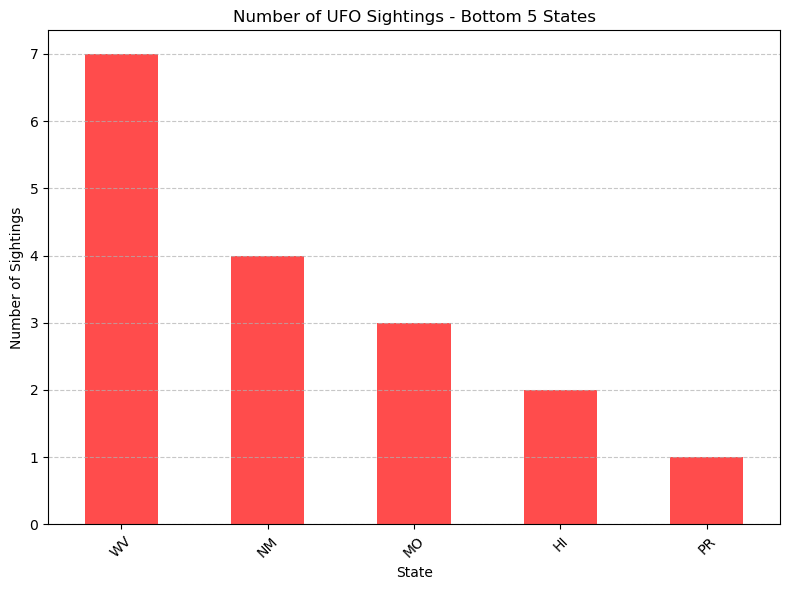

In [38]:
plt.figure(figsize=(8, 6))
bottom_5_states.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of UFO Sightings - Bottom 5 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bottom 10


In [39]:
bottom_10_states = state_counts.tail(10)
bottom_10_states

State
ME    7
NV    7
NH    7
DC    7
-     7
WV    7
NM    4
MO    3
HI    2
PR    1
Name: count, dtype: int64

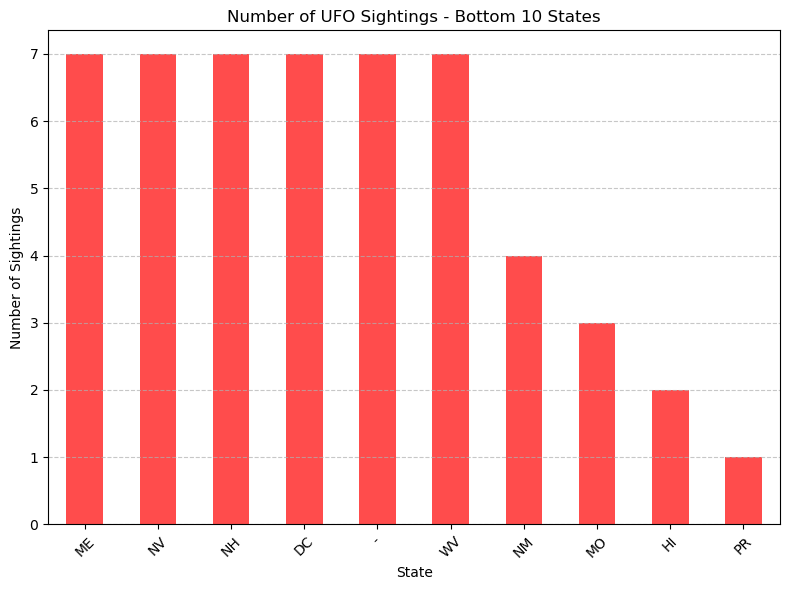

In [40]:
plt.figure(figsize=(8, 6))
bottom_10_states.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of UFO Sightings - Bottom 10 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  Combined Top 5 and Bottom 5

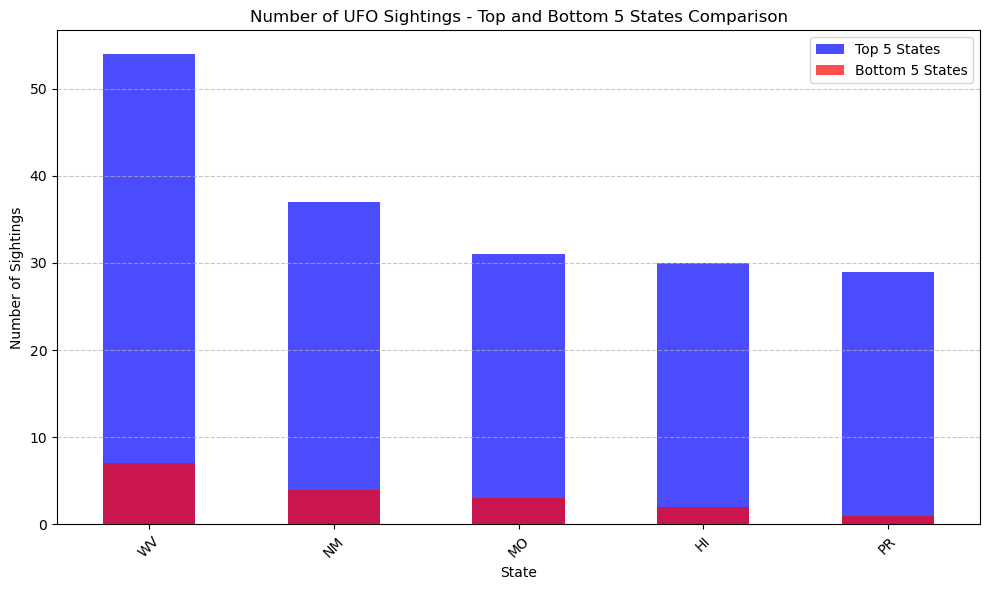

In [41]:
# Combined
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='blue', alpha=0.7, label='Top 5 States')
bottom_5_states.plot(kind='bar', color='red', alpha=0.7, label='Bottom 5 States')
plt.title('Number of UFO Sightings - Top and Bottom 5 States Comparison')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  Combined Top 10 and Bottom 10

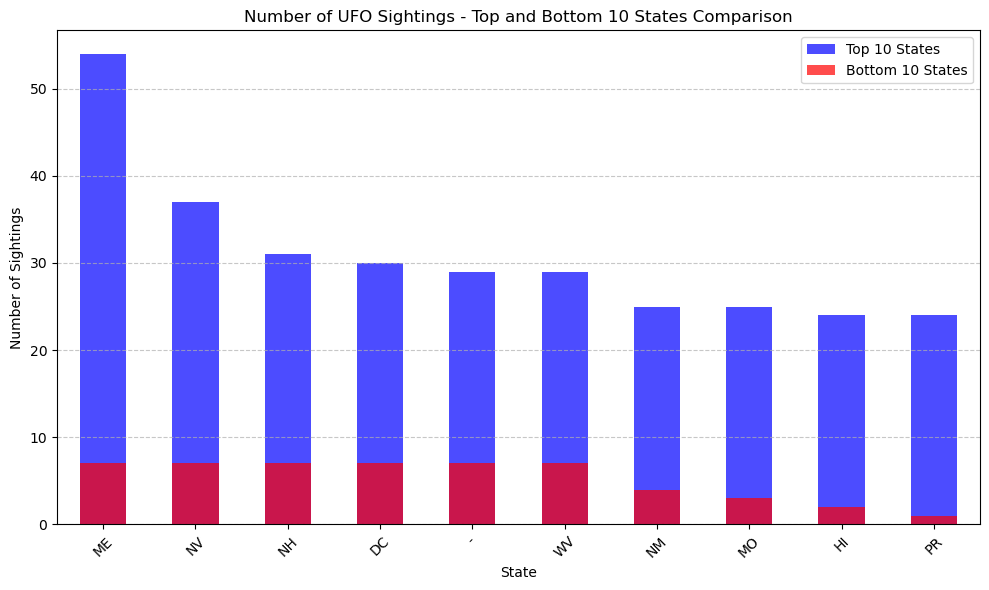

In [42]:
# Combined
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='blue', alpha=0.7, label='Top 10 States')
bottom_10_states.plot(kind='bar', color='red', alpha=0.7, label='Bottom 10 States')
plt.title('Number of UFO Sightings - Top and Bottom 10 States Comparison')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# USA- Shapes

In [43]:
shape_counts = usa_df['Shape'].value_counts()
shape_counts

Shape
Light        156
Triangle     103
Orb           93
Disk          72
Unknown       35
Sphere        34
Rectangle     26
Formation     24
Other         23
Diamond       17
Cylinder      17
Cigar         17
Changing      15
Chevron       12
Circle        12
Teardrop       8
Oval           7
Star           7
Fireball       7
               3
Egg            2
Cross          1
Name: count, dtype: int64

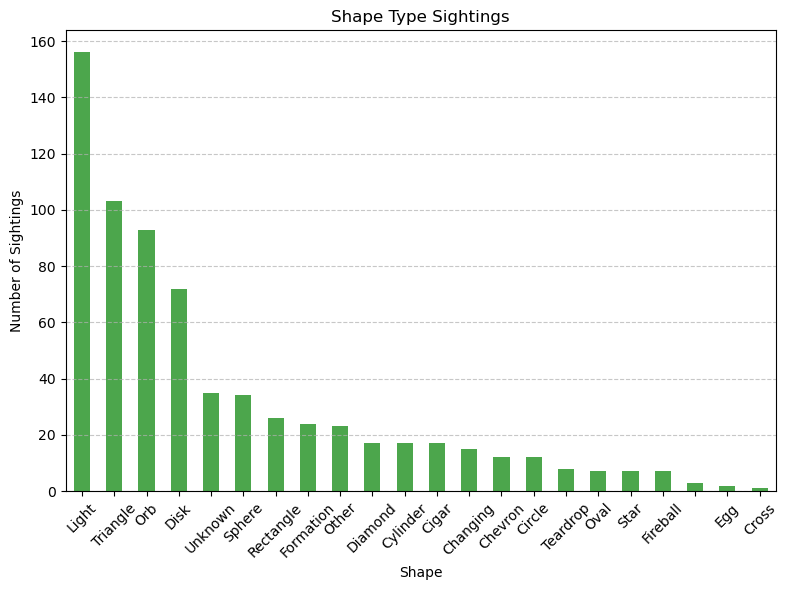

In [44]:
plt.figure(figsize=(8, 6))
shape_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Shape Type Sightings')
plt.xlabel('Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Arizona Reports

In [45]:
az_data = usa_df[usa_df['State'] == 'AZ']
az_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
37,2010-06-02,21:10:00,Tempe,AZ,USA,Disk,"Saucer shape, flying over Tempe, 6-7 white lig..."
49,2015-02-01,19:40:00,Tempe,AZ,USA,Triangle,"I live in Tempe, AZ, a city in the Phoenix met..."
70,2017-01-28,20:50:00,Sahuarita,AZ,USA,Formation,"Formation of steady, orange lights east of Sah..."
81,2018-10-04,21:30:00,SE Arizona (I-10 EB),AZ,USA,Disk,Translucent saucer shaped object with bright P...
95,2020-02-21,19:30:00,Scottsdale,AZ,USA,Other,Bank of what looked like blacklight screens fl...
109,2024-02-18,16:33:00,Mesa,AZ,USA,Triangle,One triangular shaped craft hovering over area...
125,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
154,2023-11-18,12:15:00,Oro Valley,AZ,USA,Sphere,Metallic UAP or Balloon
177,2023-10-31,19:00:00,Casa Grande,AZ,USA,Light,Rectangular light fixed in the Northwestern sk...
183,2023-10-24,09:33:00,Government Hill,AZ,USA,Triangle,Enormous white triangle craft with point strai...


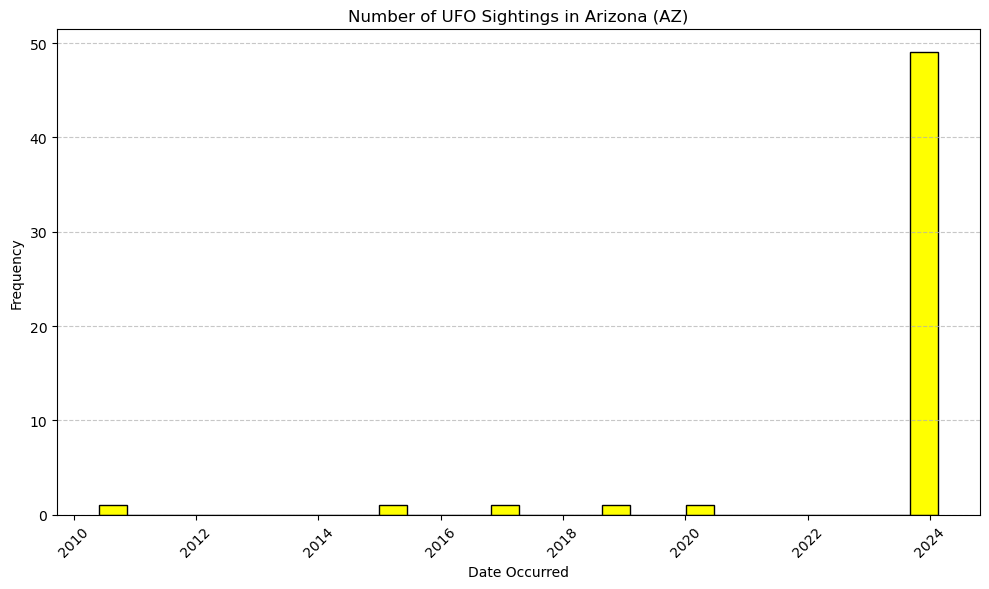

In [46]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(az_data['Date Occured'], bins=30, color='yellow', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona (AZ)')
plt.xlabel('Date Occurred')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cities/Phoenix

In [47]:
# Count the number of sightings for each city in Arizona
city_counts = az_data['City'].value_counts()

# Sort the cities based on the number of sightings in descending order
sorted_cities = city_counts.sort_values(ascending=False)
print(sorted_cities)




City
Mesa                    7
Phoenix                 7
Oro Valley              7
Casa Grande             7
Government Hill         7
Green Valley            7
Sonoita, Arizona        7
Tempe                   2
Sahuarita               1
SE Arizona (I-10 EB)    1
Scottsdale              1
Name: count, dtype: int64


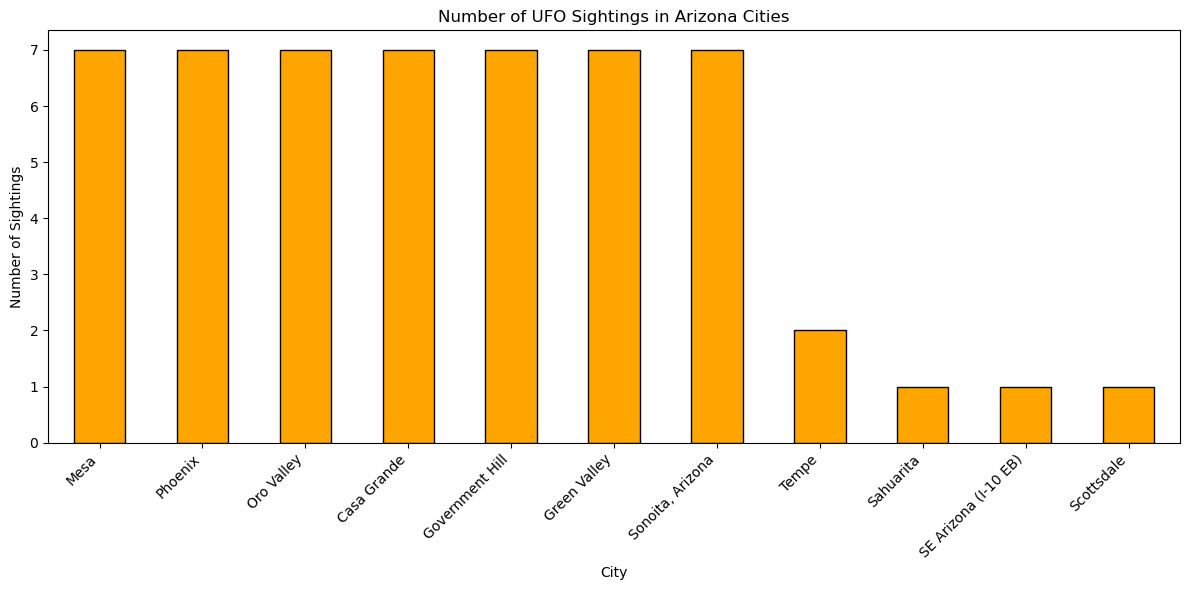

In [48]:
# Plotting
plt.figure(figsize=(12, 6))
sorted_cities.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona Cities')
plt.xlabel('City')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [49]:
## Phoenix
phx_data = usa_df[usa_df['City'] == 'Phoenix']
phx_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
125,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
226,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
327,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
428,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
529,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
630,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
731,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...


## Years

In [50]:
year_2022 = usa_df[usa_df['Date Occured'].dt.year == 2022]
year_2022

,Date Occured,Time Occured,City,State,Country,Shape,Summary


In [51]:
year_2023 = usa_df[usa_df['Date Occured'].dt.year == 2023]
year_2023

,Date Occured,Time Occured,City,State,Country,Shape,Summary
134,2023-12-26,20:40:00,Bunnell,FL,USA,Changing,What appeared as bright star like points of li...
136,2023-12-20,03:00:00,Horace,KS,USA,Unknown,4 white lights of changing intensity resemblin...
137,2023-12-16,22:45:00,Little Rock,AR,USA,Light,5 Lights Moving Rapidly and Changing Direction
138,2023-12-16,20:50:00,Ferndale,MI,USA,Sphere,A simple sighting which lasted one second.
139,2023-12-14,19:45:00,Pawleys Island,SC,USA,Triangle,4-5 orange solid lights arranged in a triangle...
...,...,...,...,...,...,...,...
802,2023-10-13,19:00:00,"Sonoita, Arizona",AZ,USA,Light,Bright light lasting for 5 to 6 total Mississi...
803,2023-10-12,23:40:00,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...
804,2023-10-12,20:35:00,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights..."
805,2023-10-09,03:30:00,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...


In [52]:
year_2024 = usa_df[usa_df['Date Occured'].dt.year == 2024]
year_2024

,Date Occured,Time Occured,City,State,Country,Shape,Summary
101,2024-03-02,22:23:00,Beckley,WV,USA,Orb,My captain and I saw moving stars. Looked kind...
102,2024-02-28,22:00:00,Felton,CA,USA,Other,"Vaguely cube shaped, with multicolored lights ..."
104,2024-02-28,19:06:00,Manitowoc,WI,USA,Triangle,Light flicker on house then looked up and seen...
105,2024-02-27,21:00:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
106,2024-02-25,21:12:00,Washington,DC,USA,Light,White light illuminated stationary before rapi...
...,...,...,...,...,...,...,...
732,2024-01-13,19:25:00,Charlotte,NC,USA,Triangle,An object with lights went back and forth
734,2024-01-10,20:10:00,Yakima,WA,USA,Light,"Flying from DEN to PSC at 34,000’. Witnessed m..."
736,2024-01-07,20:40:00,Roseburg,OR,USA,Light,2 lights looked to be spinning.
738,2024-01-02,22:40:00,Oklahoma City,OK,USA,Oval,Seen the blue white oval object dart right to ...


In [53]:
yearly_counts_2022 = year_2022.groupby(year_2022['Date Occured'].dt.date).size()
yearly_counts_2022

Series([], dtype: int64)

In [54]:
yearly_counts_2023 = year_2023.groupby(year_2023['Date Occured'].dt.date).size()
yearly_counts_2023




Date Occured
2023-10-08     7
2023-10-09     7
2023-10-12    14
2023-10-13    14
2023-10-14     7
2023-10-16     7
2023-10-17     7
2023-10-18     7
2023-10-19    21
2023-10-21     7
2023-10-22     7
2023-10-24    14
2023-10-27     7
2023-10-29     7
2023-10-30     7
2023-10-31     7
2023-11-02     7
2023-11-05    21
2023-11-06     7
2023-11-08    14
2023-11-09    21
2023-11-10     7
2023-11-11    28
2023-11-12     7
2023-11-13    14
2023-11-14     7
2023-11-15     7
2023-11-16     7
2023-11-17     7
2023-11-18     7
2023-11-20     7
2023-11-21    14
2023-11-24     7
2023-11-25     7
2023-11-26     7
2023-11-28     7
2023-11-30    14
2023-12-03     7
2023-12-04     7
2023-12-08     7
2023-12-13     7
2023-12-14     7
2023-12-16    14
2023-12-20     7
2023-12-26     7
dtype: int64

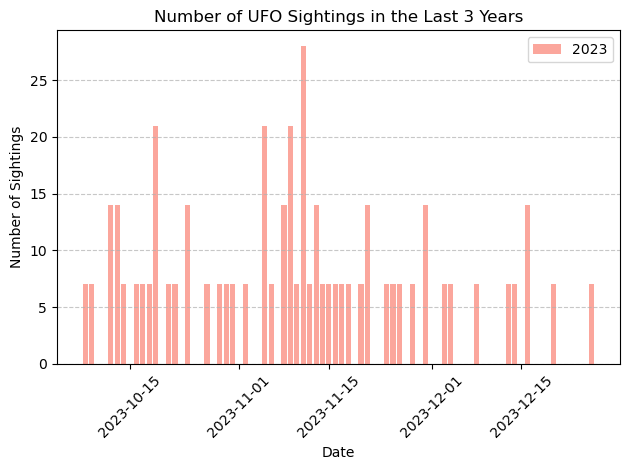

In [55]:
plt.bar(yearly_counts_2023.index, yearly_counts_2023, label='2023', color='salmon', alpha=0.7)
plt.title('Number of UFO Sightings in the Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
yearly_counts_2024 = year_2024.groupby(year_2024['Date Occured'].dt.date).size()
yearly_counts_2024

Date Occured
2024-01-02    14
2024-01-07     7
2024-01-10     7
2024-01-13     7
2024-01-14    14
2024-01-16     7
2024-01-17     7
2024-01-21     7
2024-01-27    14
2024-02-01     7
2024-02-05    14
2024-02-06    14
2024-02-16     7
2024-02-17     7
2024-02-18     7
2024-02-19     7
2024-02-25     7
2024-02-27     7
2024-02-28    14
2024-03-02     7
dtype: int64

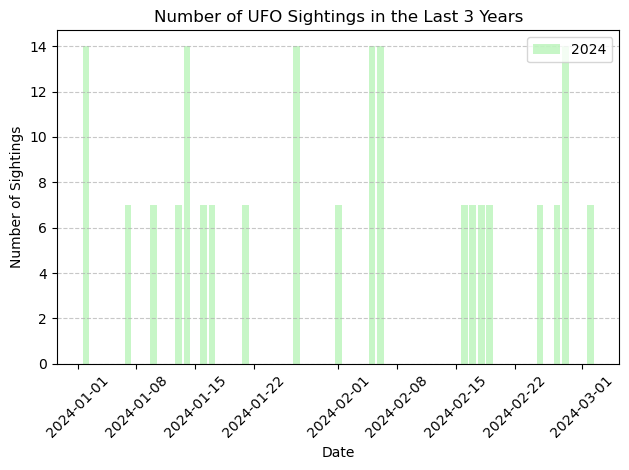

In [57]:
plt.bar(yearly_counts_2024.index, yearly_counts_2024, label='2024', color='lightgreen', alpha=0.5)

plt.title('Number of UFO Sightings in the Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
daily_counts_2023 = year_2023.groupby(year_2023['Date Occured'].dt.date).size()
daily_counts_2023


Date Occured
2023-10-08     7
2023-10-09     7
2023-10-12    14
2023-10-13    14
2023-10-14     7
2023-10-16     7
2023-10-17     7
2023-10-18     7
2023-10-19    21
2023-10-21     7
2023-10-22     7
2023-10-24    14
2023-10-27     7
2023-10-29     7
2023-10-30     7
2023-10-31     7
2023-11-02     7
2023-11-05    21
2023-11-06     7
2023-11-08    14
2023-11-09    21
2023-11-10     7
2023-11-11    28
2023-11-12     7
2023-11-13    14
2023-11-14     7
2023-11-15     7
2023-11-16     7
2023-11-17     7
2023-11-18     7
2023-11-20     7
2023-11-21    14
2023-11-24     7
2023-11-25     7
2023-11-26     7
2023-11-28     7
2023-11-30    14
2023-12-03     7
2023-12-04     7
2023-12-08     7
2023-12-13     7
2023-12-14     7
2023-12-16    14
2023-12-20     7
2023-12-26     7
dtype: int64

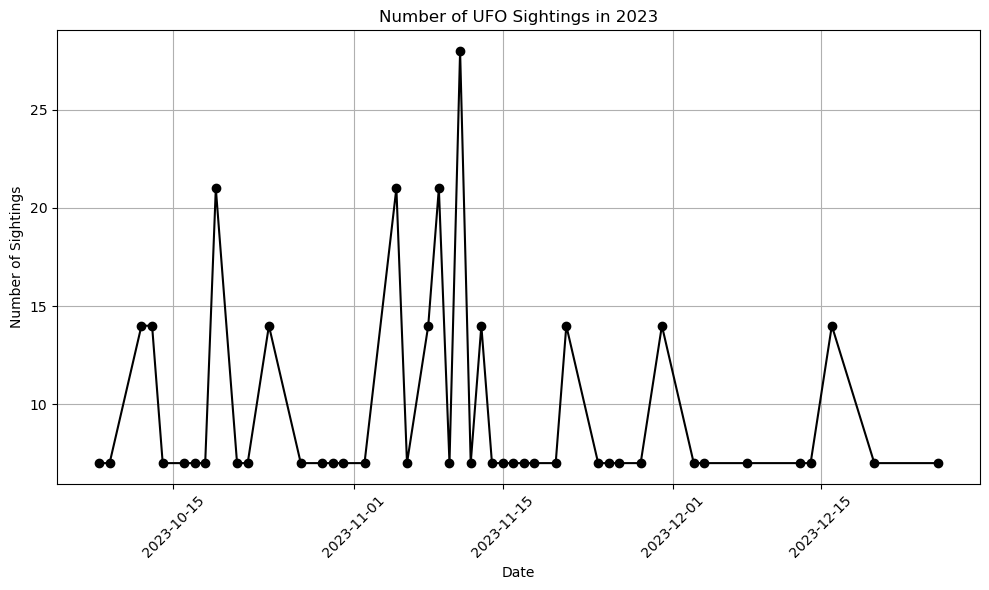

In [59]:
# Plotting 
plt.figure(figsize=(10, 6))
daily_counts_2023.plot(kind='line', marker='o', color='black')

plt.title('Number of UFO Sightings in 2023')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
daily_counts_2024 = year_2024.groupby(year_2024['Date Occured'].dt.date).size()
daily_counts_2024


Date Occured
2024-01-02    14
2024-01-07     7
2024-01-10     7
2024-01-13     7
2024-01-14    14
2024-01-16     7
2024-01-17     7
2024-01-21     7
2024-01-27    14
2024-02-01     7
2024-02-05    14
2024-02-06    14
2024-02-16     7
2024-02-17     7
2024-02-18     7
2024-02-19     7
2024-02-25     7
2024-02-27     7
2024-02-28    14
2024-03-02     7
dtype: int64

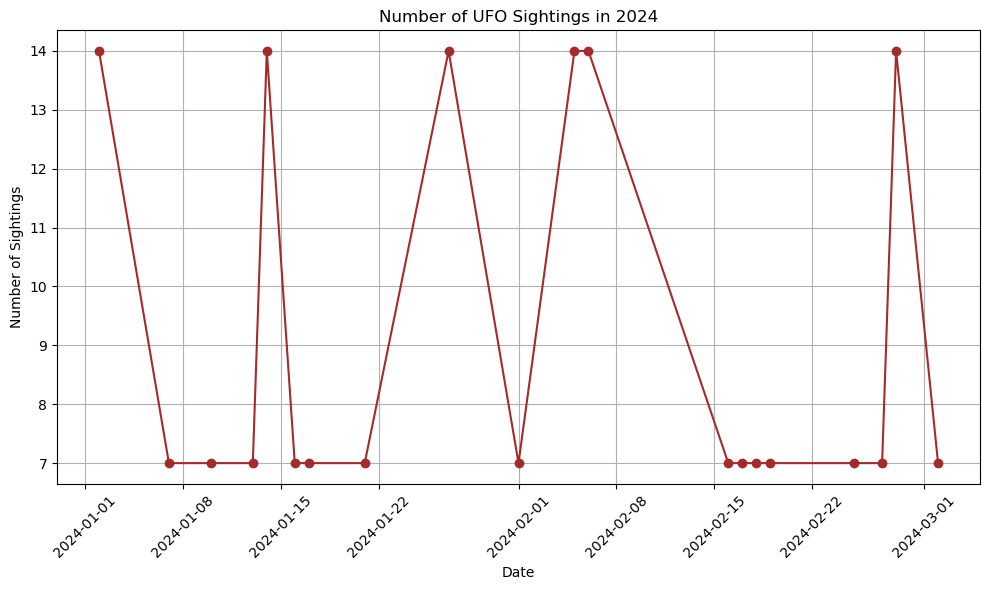

In [61]:
# Plotting 
plt.figure(figsize=(10, 6))
daily_counts_2024.plot(kind='line', marker='o', color='brown')

plt.title('Number of UFO Sightings in 2024')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()